#### Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from sklearn.feature_extraction.text import TfidfVectorizer

#### Base de Dados

Para exemplificar extraí os títulos de links de uma pesquisa no Google, dois títulos da primeira página e dois títulos da segunda página. Logo temos um ranqueamento de referência.

In [2]:
corpus = [
    "Food Trucks em Manaus", # Consulta
    "Conheça alguns dos principais food parks espalhados por toda a cidade de Manaus", # Página 1 do Google
    "O melhor food truck de Manaus (Em novo endereço)", # Página 1 do Google
    "Como chegar a Bambina Food Truck em Manaus de Ônibus?", # Página 4 do Google
    "Projeto de Lei regulamenta Food Trucks em Manaus" # Página 4 do Google
]

As limitações da criação deste ranqueamento são inumeras, dentre elas posso comentar que não estamos realizando um tratamento correto das frases por exemplo.

In [3]:
vectorizer = TfidfVectorizer(analyzer='word')
x = vectorizer.fit_transform(corpus)

In [4]:
'Corpus: ' + ' '.join(vectorizer.get_feature_names())

'Corpus: alguns bambina chegar cidade como conheça de dos em endereço espalhados food lei manaus melhor novo parks por principais projeto regulamenta toda truck trucks ônibus'

#### Similaridade

Distância Euclidiana 

In [5]:
for i in range(1, 5):
    dist = norm((x[0, :] - x[i, :]).A)
    print(f"Distância(Consulta, Documento {i}) = {dist:.2f}")

Distância(Consulta, Documento 1) = 1.33
Distância(Consulta, Documento 2) = 1.19
Distância(Consulta, Documento 3) = 1.21
Distância(Consulta, Documento 4) = 0.95


Similaridade de Cossenos

In [6]:
def cosine_similarity(x, y):
    x = x.A.ravel()
    y = y.A.ravel()
    return np.dot(x, y) / (norm(x) * norm(y))

In [7]:
for i in range(1, 5):
    sim = cosine_similarity(x[0, :], x[i, :])
    print(f"Similaridade(Consulta, Documento {i}) = {sim:.2f}")

Similaridade(Consulta, Documento 1) = 0.12
Similaridade(Consulta, Documento 2) = 0.30
Similaridade(Consulta, Documento 3) = 0.27
Similaridade(Consulta, Documento 4) = 0.55


#### Ranqueamento

Divindo os documentos em relevantes (R) e irrelevantes (I) vemos que nosso ranqueamento retornou a sequência I, R, I, R. Uma forma de avaliar este ranquemento é pela precisão e revocação dos primeiros `n` elementos, mostrado a seguir.

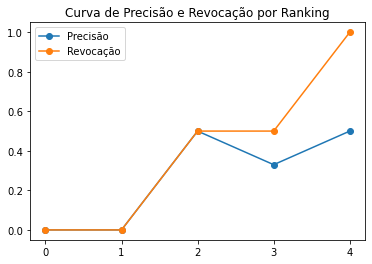

In [10]:
plt.plot(range(5), [0, 0, 0.5, 0.33, 0.5], 'o-', color='C0', label='Precisão')
plt.plot(range(5), [0, 0, 0.5, 0.5, 1], 'o-', color='C1', label='Revocação')
plt.title("Curva de Precisão e Revocação por Ranking")
plt.xticks(range(5))
plt.legend()
plt.show()